# Create Plots for Manuscript

(File paths to measurements are replaced by placeholders)

In [1]:
import itertools
from functions import * 

uniquecolors = ['#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499']

### Default Plots

Bonferroni-corrected level of significance: 0.05


,volfrac,totallen,nseg,nskel,njunc,nend,seglen
15 nM Sorafenib (n=3),0.690830,0.819718,0.719960,1.199173,0.734722,0.630365,0.038646


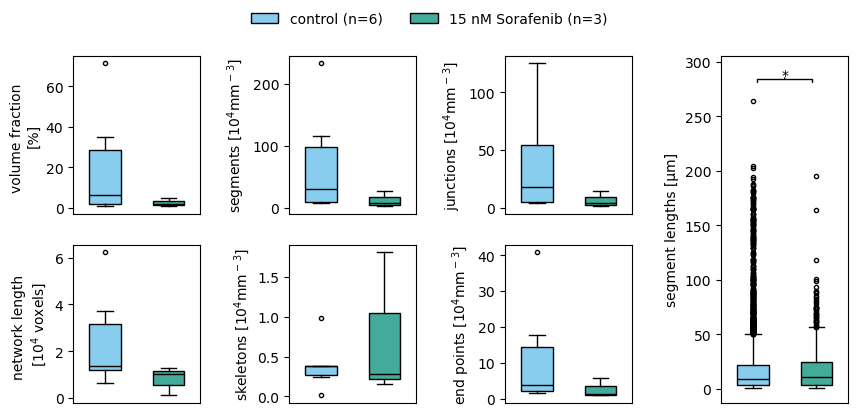

In [ ]:
# plot for dataset B (sorafenib)

colors = uniquecolors[:2]
input_paths = [
    'path/to/vesna/output/control/',
    'path/to/vesna/output/15nMSora/'  
]

plot_measurements(
    input_paths=input_paths, 
    labels=['control', '15 nM Sorafenib'], 
    layout='horizontal', 
    colors=colors
);

Bonferroni-corrected level of significance: 0.05


,volfrac,totallen,nseg,nskel,njunc,nend,seglen
large molds (n=4),0.871773,0.182022,1.242983,1.099860,1.192627,1.838649,1.185976


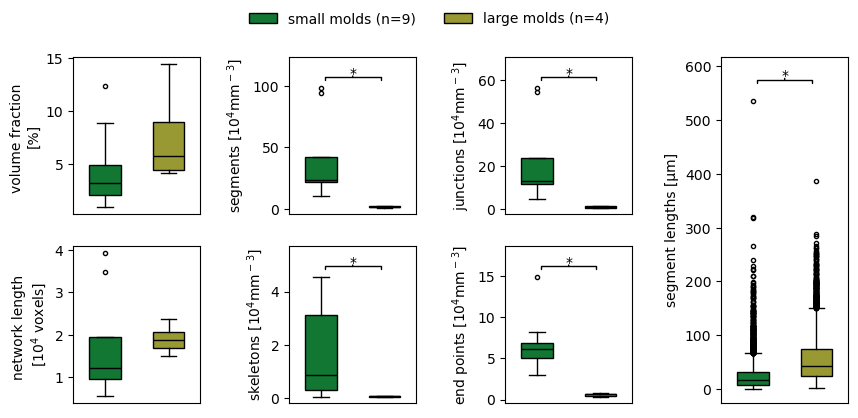

In [ ]:
# plot for dataset C (small and large molds)

colors = uniquecolors[2:5]
input_paths = [
    'path/to/vesna/output/small molds/',
    'path/to/vesna/output/big molds/'
]

plot_measurements(
    input_paths=input_paths, 
    labels=['small molds', 'large molds'], 
    layout='horizontal', 
    colors=colors
);

Bonferroni-corrected level of significance: 0.05


,volfrac,totallen,nseg,nskel,njunc,nend,seglen
d17 (n=8),2.849619,4.847261,3.615695,1.111438,3.988986,1.362454,0.360110


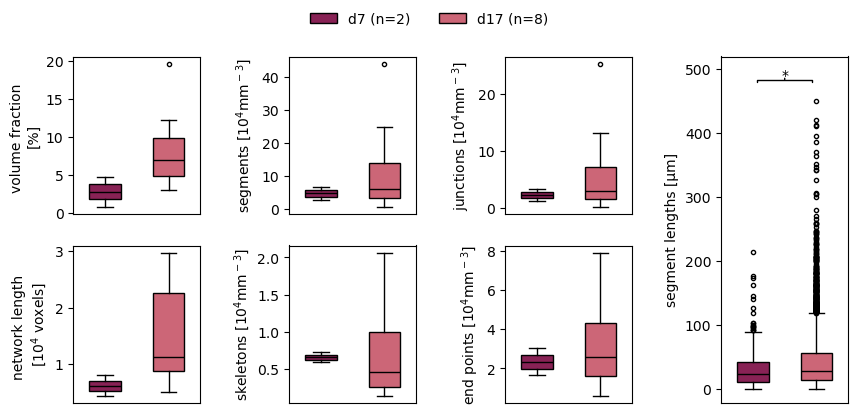

In [ ]:
# plot for dataset D (hydrogel cultures)

colors = [uniquecolors[6], uniquecolors[5]]
input_paths = [
    'path/to/vesna/output/d7/', 
    'path/to/vesna/output/d17/'
]

plot_measurements(
    input_paths=input_paths, 
    labels=['d7', 'd17'], 
    layout='horizontal', 
    colors=colors
);

### Special Plots

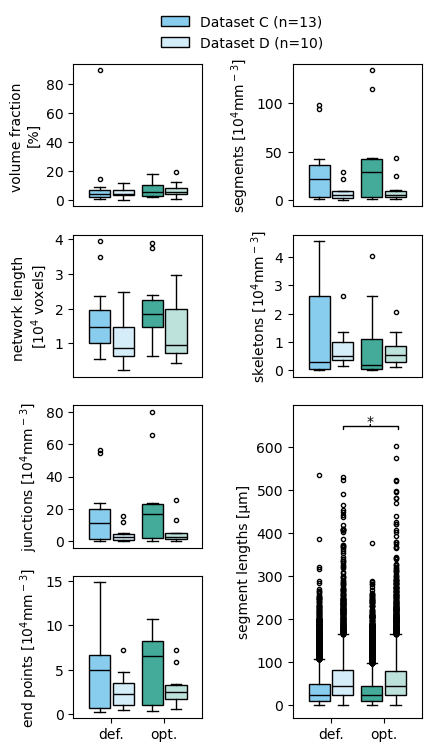

In [ ]:
# plot default and optimized parameter settings

import matplotlib.pyplot as plt

colors = uniquecolors[:2]
input_paths = [
    'path/to/vesna/output/1 - default/dataset c/',
    'path/to/vesna/output/1 - default/dataset d/', 
    'path/to/vesna/output/2 - optimized/dataset c/',
    'path/to/vesna/output/2 - optimized/dataset d/' 
]

plot_measurements_doublebox(    ## significance is not displayed in double box plots
    input_paths=input_paths, 
    labels=['Dataset C', 'Dataset D'], 
    layout='vertical', 
    ticks=['def.', 'opt.'], 
    colors=colors
);

ax = plt.gca()
_, upper = ax.get_ylim()
ax.set_ylim(bottom=None, top=upper*1.1)

ax.annotate('*',
    xy=(0.6, 0.925), 
    xycoords='axes fraction',
    xytext=(0.6, 0.925),
    textcoords='axes fraction',
    va='bottom',
    ha='center',
    arrowprops=dict(arrowstyle='-[, widthB=2')
);

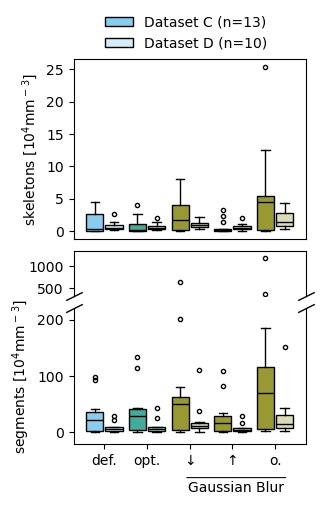

In [ ]:
# plot gaussian blur skeletons and segments

colors = [uniquecolors[0], uniquecolors[1], uniquecolors[3], uniquecolors[3], uniquecolors[3]]
input_paths = [
    'path/to/vesna/output/1 - default/dataset c/',
    'path/to/vesna/output/1 - default/dataset d/', 
    'path/to/vesna/output/2 - optimized/dataset c/',
    'path/to/vesna/output/2 - optimized/dataset d/', 
    'path/to/vesna/output/7 - gauss 05/dataset c/',
    'path/to/vesna/output/7 - gauss 05/dataset d/', 
    'path/to/vesna/output/8 - gauss 3/dataset c/',
    'path/to/vesna/output/8 - gauss 3/dataset d/', 
    'path/to/vesna/output/9 - gauss omitted/dataset c/',
    'path/to/vesna/output/9 - gauss omitted/dataset d/'
]

labels = ['Dataset C', 'Dataset D']
ticks = ['def.', 'opt.', '↓', '↑', 'o.']
legend = True

# read measurements

dict_list = []      # gets filled with dictionaries

for path in input_paths:
    temp = get_measurement(path)
    dict_list.append(temp)

# create box plot

measurement_labels = [
    'skeletons [mm$^-$$^3$]', 
    'segments [mm$^-$$^3$]']

keys = ['nskel', 'nseg']

labels = [labels[l]+' (n='+str(len(dict_list[l][keys[0]]))+')' for l in range(0, len(labels))]

# fig = plt.figure(figsize=(4.5, 6))
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(3, 5), height_ratios=[4, 1, 3])


# subplot 1
plt.subplot(3, 1, 1)
a = 0
ax = plt.gca()
key = keys[a]

max_value = np.max([np.max(d[key]) for d in dict_list])
if max_value >= 1000:         # rescale axes with very high values
    boxdata = [[value*0.001 for value in d[key]] for d in dict_list]
    measurement_labels[a] = measurement_labels[a].split('[')[0]+'[10$^4$'+measurement_labels[a].split('[')[1]
else:
    boxdata = [d[key] for d in dict_list]
# create double boxes
leftdata = boxdata[0::2]
rightdata = boxdata[1::2]
bp = ax.boxplot(        # left boxes
    leftdata,
    positions=[p-0.225 for p in range(0, int(len(input_paths)/2))],
    patch_artist=True,
    medianprops=dict(color='black'),
    sym='.',
    widths=0.4
)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax.set_ylabel(measurement_labels[a])
ax.set_xticks([])
bp = ax.boxplot(        # right boxes
    rightdata,
    positions=[p+0.225 for p in range(0, int(len(input_paths)/2))],
    patch_artist=True,
    medianprops=dict(color='black'),
    sym='.',
    widths=0.4
)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor((color, 0.35))
ax.set_ylabel(measurement_labels[a])
ax.set_xticks([])

# subplot 2 top
plt.subplot(3, 1, 2)
a = 1
ax = plt.gca()
ax1 = ax
key = keys[a]

max_value = np.max([np.max(d[key]) for d in dict_list])
if max_value >= 1000:         # rescale axes with very high values
    boxdata = [[value*0.001 for value in d[key]] for d in dict_list]
    measurement_labels[a] = measurement_labels[a].split('[')[0]+'[10$^4$'+measurement_labels[a].split('[')[1]
else:
    boxdata = [d[key] for d in dict_list]
# create double boxes
leftdata = boxdata[0::2]
rightdata = boxdata[1::2]
bp = ax.boxplot(        # left boxes
    leftdata,
    positions=[p-0.225 for p in range(0, int(len(input_paths)/2))],
    patch_artist=True,
    medianprops=dict(color='black'),
    sym='.',
    widths=0.4
)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticks([])
bp = ax.boxplot(        # right boxes
    rightdata,
    positions=[p+0.225 for p in range(0, int(len(input_paths)/2))],
    patch_artist=True,
    medianprops=dict(color='black'),
    sym='.',
    widths=0.4
)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor((color, 0.35))
ax.set_xticks([])

ax.set_ylim(320, 1325)
ax.spines.bottom.set_visible(False)

# subplot 2 bottom
plt.subplot(3, 1, 3)
a = 1
ax = plt.gca()
ax2 = ax
key = keys[a]

# create double boxes
leftdata = boxdata[0::2]
rightdata = boxdata[1::2]
bp = ax.boxplot(        # left boxes
    leftdata,
    positions=[p-0.225 for p in range(0, int(len(input_paths)/2))],
    patch_artist=True,
    medianprops=dict(color='black'),
    sym='.',
    widths=0.4
)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax.set_ylabel(measurement_labels[a])
ax.set_xticks([])
bp = ax.boxplot(        # right boxes
    rightdata,
    positions=[p+0.225 for p in range(0, int(len(input_paths)/2))],
    patch_artist=True,
    medianprops=dict(color='black'),
    sym='.',
    widths=0.4
)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor((color, 0.35))
ax.set_ylabel(measurement_labels[a])
ax.set_xticks([])

ax.set_ylim(-20, 220)
ax.spines.top.set_visible(False)

ax.set_xticks(range(0, int(len(input_paths)/2)), ticks)

d = .5  # proportion of vertical to horizontal extent of the slanted line  # add slanted lines to indicate broken axis
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.gca().annotate('', xy=(0.7-(0.45/2), -0.25), xytext=(0.7+(0.45/2), -0.25), rotation=90,
    ha='center', va='top', xycoords='axes fraction', 
    arrowprops=dict(arrowstyle='-'.format(0.5), lw=0.75))
plt.gca().annotate('Gaussian Blur', xy=(0.7, -0.0), xytext=(0.7, -0.275),
    ha='center', va='top', xycoords='axes fraction', fontsize=10)

fig.subplots_adjust(hspace=0.1)

# create legends
if legend == True:  # format legend 
    patches = []
    patches.append(mpatches.Patch(
        facecolor=colors[0],
        label=labels[0],
        edgecolor='black'))
    patches.append(mpatches.Patch(
        facecolor= mpl.colors.to_rgba(colors[0], 0.35),
        label=labels[1],
        edgecolor='black'
    ))
    
    fig.legend(
        labels=labels, 
        handles=patches, 
        loc='upper center', 
        # bbox_to_anchor=(0, 0.85, 1, 0.102),  # second argument can be adjusted for vertical position of legend
        bbox_to_anchor=(0, 0.89, 1, 0.102),  # second argument can be adjusted for vertical position of legend
        ncol = 1,
        frameon = False)

### Complete Measurements Plot

In [ ]:
# define input paths

input_paths = [
    'path/to/vesna/output/1 - default/dataset c/',
    'path/to/vesna/output/1 - default/dataset d/', 
    'path/to/vesna/output/2 - optimized/dataset c/',
    'path/to/vesna/output/2 - optimized/dataset d/' ,
    'path/to/vesna/output/3 - brightness min 30/dataset c/',
    'path/to/vesna/output/3 - brightness min 30/dataset d/',
    'path/to/vesna/output/4 - brightness max 30/dataset c/',
    'path/to/vesna/output/4 - brightness max 30/dataset d/',
    'path/to/vesna/output/5 - brightness max 200/dataset c/',
    'path/to/vesna/output/5 - brightness max 200/dataset d/',
    'path/to/vesna/output/6 - brightness omitted/dataset c/',
    'path/to/vesna/output/6 - brightness omitted/dataset d/',
    'path/to/vesna/output/7 - gauss 05/dataset c/',
    'path/to/vesna/output/7 - gauss 05/dataset d/',
    'path/to/vesna/output/8 - gauss 3/dataset c/',
    'path/to/vesna/output/8 - gauss 3/dataset d/',
    'path/to/vesna/output/9 - gauss omitted/dataset c/',
    'path/to/vesna/output/9 - gauss omitted/dataset d/',
    'path/to/vesna/output/10 - analyze particles 20/dataset c/',
    'path/to/vesna/output/10 - analyze particles 20/dataset d/',
    'path/to/vesna/output/11 - analyze particles 150/dataset c/',
    'path/to/vesna/output/11 - analyze particles 150/dataset d/',
    'path/to/vesna/output/12 - analyze particles omitted/dataset c/',
    'path/to/vesna/output/12 - analyze particles omitted/dataset d/',
    'path/to/vesna/output/16 - max 1 min 1/dataset c/',
    'path/to/vesna/output/16 - max 1 min 1/dataset d/',
    'path/to/vesna/output/17 - max 6 min 7/dataset c/',
    'path/to/vesna/output/17 - max 6 min 7/dataset d/',
    'path/to/vesna/output/18 - min max omitted/dataset c/',
    'path/to/vesna/output/18 - min max omitted/dataset d/',
    'path/to/vesna/output/13 - pruning 10/dataset c/',
    'path/to/vesna/output/13 - pruning 10/dataset d/',
    'path/to/vesna/output/14 - pruning 100/dataset c/',
    'path/to/vesna/output/14 - pruning 100/dataset d/',
    'path/to/vesna/output/15 - pruning omitted/dataset c/',
    'path/to/vesna/output/15 - pruning omitted/dataset d/'
]

Bonferroni-corrected level of significance for volume fraction measurement:	0.0035714285714285718
Bonferroni-corrected level of significance for remaining measurements:	 	0.0029411764705882353


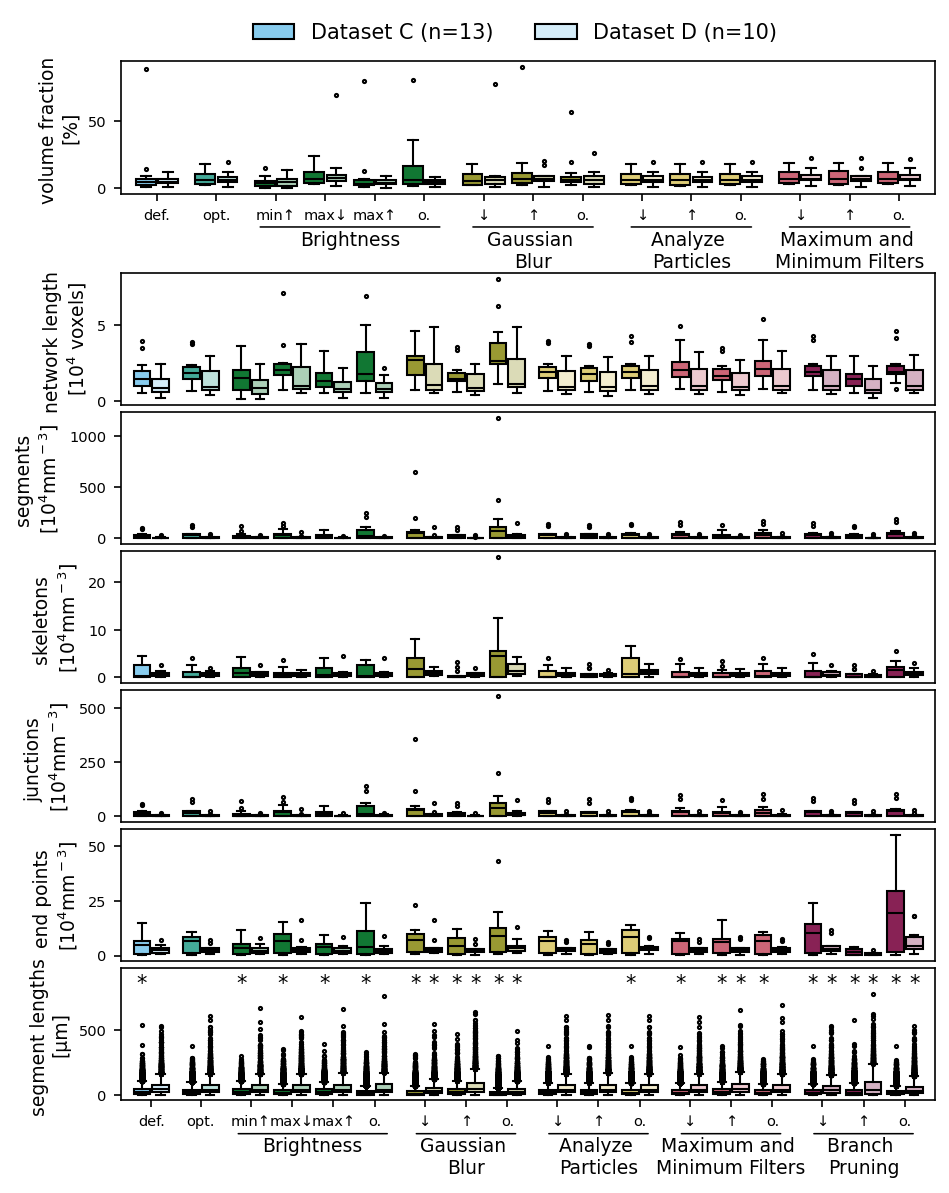

In [8]:
# plot complete measurements

colors = [
    uniquecolors[0],
    uniquecolors[1],
    uniquecolors[2], uniquecolors[2], uniquecolors[2], uniquecolors[2],
    uniquecolors[3], uniquecolors[3], uniquecolors[3],
    uniquecolors[4], uniquecolors[4], uniquecolors[4],
    uniquecolors[5], uniquecolors[5], uniquecolors[5],
    uniquecolors[6], uniquecolors[6], uniquecolors[6]
]

labels = ['Dataset C', 'Dataset D']
ticks = ['def.', 'opt.', 'min↑', 'max↓', 'max↑', 'o.', '↓', '↑', 'o.', '↓', '↑', 'o.', '↓', '↑', 'o.', '↓', '↑', 'o.']
bracket_names = ['Brightness', 'Gaussian \nBlur', 'Analyze \nParticles', 'Maximum and \nMinimum Filters', 'Branch \nPruning']
ref_group = 1

# read measurements

dict_list = []      # gets filled with dictionaries

for path in input_paths:
    temp = get_measurement(path)
    dict_list.append(temp)

keys = list(dict_list[0].keys())
labels = [labels[l]+' (n='+str(len(dict_list[l][keys[0]]))+')' for l in range(0, len(labels))]

leftmarkers = {        # gets filled with significance markers for plot
    'volfrac': [],
    'totallen': [],
    'nseg': [], 'nskel': [], 'njunc': [], 'nend': [],
    'seglen': []
}
rightmarkers = {        # gets filled with significance markers for plot
    'volfrac': [],
    'totallen': [],
    'nseg': [], 'nskel': [], 'njunc': [], 'nend': [],
    'seglen': []
}
keys = list(leftmarkers.keys())

leftgroup = input_paths[0::2]
rightgroup = input_paths[1::2]
leftdata = dict_list[0::2]
rightdata = dict_list[1::2]
j = 0  # flag
l = 0  # flag
for i in range(0, len(leftgroup)):
    if i != ref_group:
        for k in keys:
            if k == 'volfrac':
                bonferroni = 0.05/(len(leftgroup)-4)  ## exclude branch pruning measurements
                if j == 0:
                    print('Bonferroni-corrected level of significance for volume fraction measurement:\t'+str(bonferroni))
                j = 1
            else:
                bonferroni = 0.05/(len(leftgroup)-1)
                if l == 0:
                    print('Bonferroni-corrected level of significance for remaining measurements:\t \t'+str(bonferroni))
                l = 1
            temp = mwu_test(
                reference_group=leftdata[ref_group][k], 
                test_group=leftdata[i][k], 
                significance=bonferroni)
            leftmarkers[k].append(temp)
for i in range(0, len(rightgroup)):
    if i != ref_group:
        for k in keys:
            if k == 'volfrac':
                bonferroni = 0.05/(len(rightgroup)-4)  ## exclude branch pruning measurements
            else:
                bonferroni = 0.05/(len(rightgroup)-1)
            temp = mwu_test(
                reference_group=rightdata[ref_group][k], 
                test_group=rightdata[i][k], 
                significance=bonferroni)
            rightmarkers[k].append(temp)

# create box plot

with mpl.rc_context({'axes.labelsize': 9, 'xtick.labelsize': 7, 'ytick.labelsize': 7}):

    fig = plt.figure(figsize=(7, 9), dpi=150)
    gs = GridSpec(8, 1, figure=fig, hspace=0.05, height_ratios=[1, 0.5, 1, 1, 1, 1, 1, 1])

    axes = [fig.add_subplot(gs[i, 0]) for i in range(0, 8)]  # define subplot positions

    measurement_labels = [
            'volume fraction \n[%]', 
            'network length \n[10$^4$ voxels]', 
            'segments \n[mm$^-$$^3$]', 
            'skeletons \n[mm$^-$$^3$]', 
            'junctions \n[mm$^-$$^3$]', 
            'end points \n[mm$^-$$^3$]', 
            'segment lengths \n[μm]'
    ]

    box_positions = [
        1,                      # def.
        2.2,                    # opt.
        3.4, 4.4, 5.4, 6.4,     # brightness
        7.6, 8.6, 9.6,          # gaussian
        10.8, 11.8, 12.8,       # analyze particles
        14, 15, 16,             # max min filters
        17.2, 18.2, 19.2        # branch pruning
    ]

    # subplot 1: volume fraction
    a = 0
    ax = axes[a]
    key = keys[a]

    max_value = np.max([np.max(d[key]) for d in dict_list])
    if max_value >= 1000:         # rescale axes with very high values
        boxdata = [[value*0.001 for value in d[key]] for d in dict_list]
        measurement_labels[a] = measurement_labels[a].split('[')[0]+'[10$^4$'+measurement_labels[a].split('[')[1]
    else:
        boxdata = [d[key] for d in dict_list]
    # create double boxes
    leftdata = boxdata[0::2][:15]
    rightdata = boxdata[1::2][:15]
    bp = ax.boxplot(        # left boxes
        leftdata,
        positions=[p-0.225 for p in box_positions][:15],
        patch_artist=True,
        medianprops=dict(color='black'),
        flierprops=dict(markersize=3),
        sym='.',
        widths=0.4
    )
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    bp = ax.boxplot(        # right boxes
        rightdata,
        positions=[p+0.225 for p in box_positions][:15],
        patch_artist=True,
        medianprops=dict(color='black'),
        flierprops=dict(markersize=3),
        sym='.',
        widths=0.4
    )
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor((color, 0.35))
    ax.set_ylabel(measurement_labels[a])
    ax.set_xticks(box_positions[:15], ticks[:15]);

    # annotate significance with markers
    j = 0  # flag for markers[key] containing at least one '*'
    if '*' in leftmarkers[key]+rightmarkers[key]:
        j = 1

    if j == 1:  # only annotate, if any significance in this plot
        _, upper = ax.get_ylim()
        ax.set_ylim(bottom=None, top=upper*1.2)
        # plt.draw()

        height = max(itertools.chain.from_iterable(leftdata+rightdata))
        for i in range(0, len(leftmarkers[key])):
            ax.text(
                [p-0.225 for n, p in enumerate(box_positions) if n != ref_group][i],    # x coordinate for annotation
                height,                                 # y coordinate for annotation
                leftmarkers[key][i],                    # text
                ha='center',                            # text alignment
                va='bottom'
            )
            ax.text(
                [p+0.225 for n, p in enumerate(box_positions) if n != ref_group][i],    # x coordinate for annotation
                height,                                 # y coordinate for annotation
                rightmarkers[key][i],                   # text
                ha='center',                            # text alignment
                va='bottom'
            )

    bracket_pos_box = [4.9, 8.6, 11.8, 15]  
    bracket_width = [3.8, 2.6, 2.6, 2.6]
    for index, item in enumerate(bracket_names[:4]):
        ax.annotate('', 
            xy=(bracket_pos_box[index]-(bracket_width[index]/2), -0.25), 
            xytext=(bracket_pos_box[index]+(bracket_width[index]/2), -0.25), 
            rotation=90,
            ha='center', 
            va='top', 
            xycoords=('data', 'axes fraction'), 
            arrowprops=dict(arrowstyle='-'.format(bracket_width[index]), lw=0.75)
        )
        ax.annotate(item, 
            xy=(bracket_pos_box[index], -0.1), 
            xytext=(bracket_pos_box[index], -0.275),
            ha='center', 
            va='top', 
            xycoords=('data', 'axes fraction'), 
            fontsize=9
        )

    # add space below subplot 1 for x axis ticks
    a = 1 
    ax = axes[a]
    ax.axis('off')

    # remaining subplots
    for a in range(1, 7):
        ax = axes[a+1]
        key = keys[a]

        max_value = np.max([np.max(d[key]) for d in dict_list])
        if max_value >= 1000:         # rescale axes with very high values
            boxdata = [[value*0.001 for value in d[key]] for d in dict_list]
            measurement_labels[a] = measurement_labels[a].split('[')[0]+'[10$^4$'+measurement_labels[a].split('[')[1]
        else:
            boxdata = [d[key] for d in dict_list]
        # create double boxes
        leftdata = boxdata[0::2]
        rightdata = boxdata[1::2]
        bp = ax.boxplot(        # left boxes
            leftdata,
            positions=[p-0.225 for p in box_positions],
            patch_artist=True,
            medianprops=dict(color='black'),
            flierprops=dict(markersize=3),
            sym='.',
            widths=0.4
        )
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        bp = ax.boxplot(        # right boxes
            rightdata,
            positions=[p+0.225 for p in box_positions],
            patch_artist=True,
            medianprops=dict(color='black'),
            flierprops=dict(markersize=3),
            sym='.',
            widths=0.4
        )
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor((color, 0.35))
        ax.set_ylabel(measurement_labels[a])
        ax.set_xticks([]);

        # annotate significance with markers
        j = 0  # flag for markers[key] containing at least one '*'
        if '*' in leftmarkers[key]+rightmarkers[key]:
            j = 1

        if j == 1:  # only annotate, if any significance in this plot
            _, upper = ax.get_ylim()
            ax.set_ylim(bottom=None, top=upper*1.2)
            # plt.draw()

            height = max(itertools.chain.from_iterable(leftdata+rightdata))
            for i in range(0, len(leftmarkers[key])):
                ax.text(
                    [p-0.225 for n, p in enumerate(box_positions) if n != ref_group][i],    # x coordinate for annotation
                    height,                                 # y coordinate for annotation
                    leftmarkers[key][i],                    # text
                    ha='center',                            # text alignment
                    va='bottom'
                )
                ax.text(
                    [p+0.225 for n, p in enumerate(box_positions) if n != ref_group][i],    # x coordinate for annotation
                    height,                                 # y coordinate for annotation
                    rightmarkers[key][i],                   # text
                    ha='center',                            # text alignment
                    va='bottom'
                )

    ax.set_xticks(box_positions, ticks);

    bracket_pos_box = [4.9, 8.6, 11.8, 15, 18.2]  
    bracket_width = [3.8, 2.6, 2.6, 2.6, 2.6]
    for index, item in enumerate(bracket_names):
        ax.annotate('', 
            xy=(bracket_pos_box[index]-(bracket_width[index]/2), -0.25), 
            xytext=(bracket_pos_box[index]+(bracket_width[index]/2), -0.25), 
            rotation=90,
            ha='center', 
            va='top', 
            xycoords=('data', 'axes fraction'), 
            arrowprops=dict(arrowstyle='-'.format(bracket_width[index]), lw=0.75)
        )
        ax.annotate(item, 
            xy=(bracket_pos_box[index], -0.1), 
            xytext=(bracket_pos_box[index], -0.275),
            ha='center', 
            va='top', 
            xycoords=('data', 'axes fraction'), 
            fontsize=9
        )

# create legend
patches = []
legend_colors = [colors[0], (colors[0], 0.35)]
for p in range(0, 2):
    patches.append(mpatches.Patch(
        facecolor=legend_colors[p],
        label=labels[p],
        edgecolor='black'))
fig.legend(
    labels=labels, 
    handles=patches, 
    loc='upper center', 
    bbox_to_anchor=(0, 0.82, 1, 0.102),  # second argument can be adjusted for vertical position of legend
    ncol = 2,
    frameon = False);

plt.show()